In [1]:
from getdata import GetData

In [2]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# GetData 인스턴스 생성
data = GetData(key, 'GSBD_DG_geo.csv')

In [3]:
korea = data.get_lon_lat("sido")
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_ADSIDO_INFO&columns=ctprvn_cd, ctp_kor_nm, ctp_eng_nm, ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=G

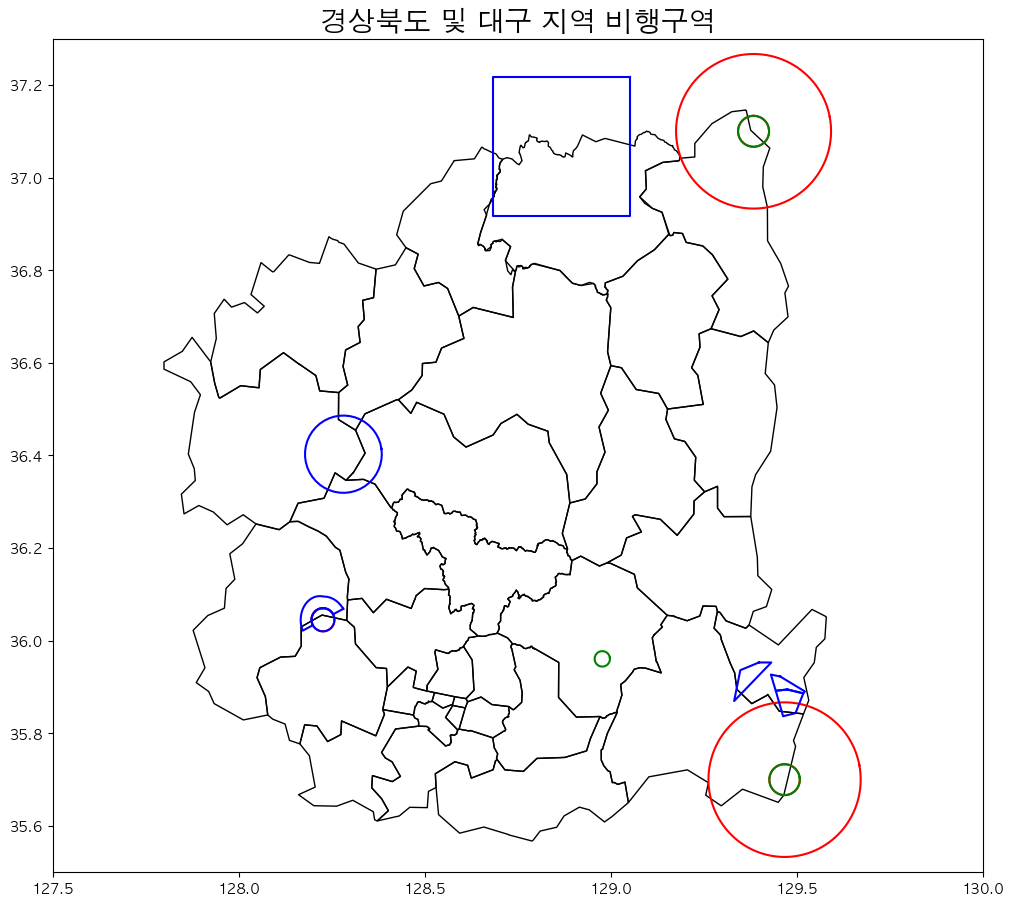

In [4]:
# save = True: 사진 저장
data.plt_visualize(prohibited, restricted, danger,  save=False)

In [5]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [6]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(prh_rev, restricted_rev, danger_rev)